In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Overlaid Histograms

In [2]:
galton = Table.read_table('galton.csv')
galton.show(3)

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69


In [3]:
height = galton.select('father', 'mother', 'childHeight').relabeled(2, 'child')
height

father,mother,child
78.5,67,73.2
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,73.5
75.5,66.5,72.5
75.5,66.5,65.5
75.5,66.5,65.5
75,64,71
75,64,68


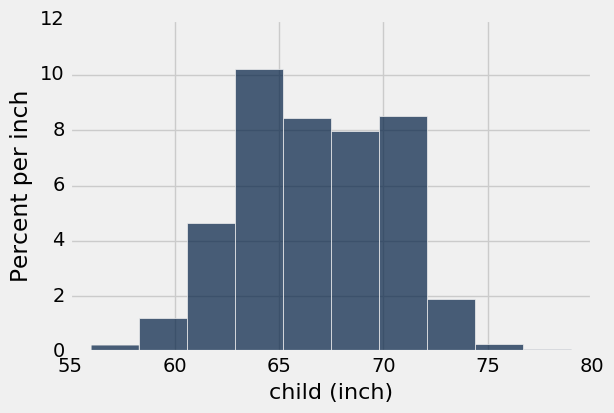

In [4]:
height.hist('child', unit='inch')

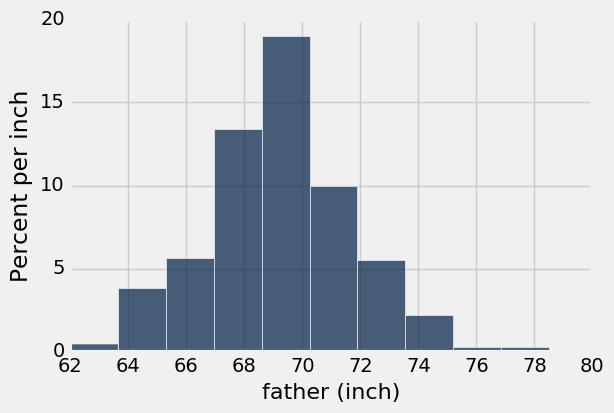

In [5]:
height.hist('father', unit='inch')

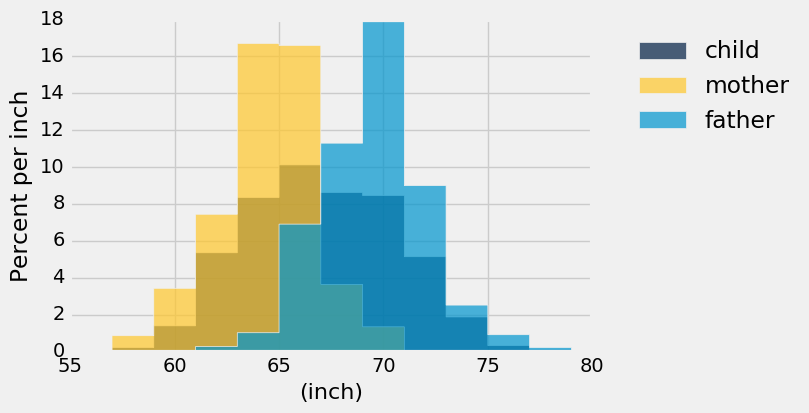

In [6]:
height.hist(unit='inch', bins=np.arange(55, 80, 2))

## Functions

In [7]:
def double(x):
    """ Double x """
    return 2*x

In [8]:
double(5)

10

In [9]:
double(5/4)

2.5

In [10]:
y = 5
double(y/4)

2.5

In [11]:
x

NameError: name 'x' is not defined

In [12]:
x = 1.5
double(x)

3.0

In [13]:
x

1.5

In [14]:
counts = make_array(1, 2, 3)
total = counts.sum()
np.round((counts/total)*100, 2)

array([ 16.67,  33.33,  50.  ])

In [15]:
def percents(counts):
    """Convert the counts to percents out of the total."""
    total = counts.sum()
    return np.round((counts/total)*100, 2)

In [16]:
percents(make_array(2, 4, 8, 6))

array([ 10.,  20.,  40.,  30.])

In [17]:
# percents(2)

In [18]:
def percents(counts, decimal_places=2, extra=0):
    """Convert the values in array_x to percents out of the total of array_x."""
    total = counts.sum() + extra
    return np.round((counts/total)*100, decimal_places)

parts = make_array(2, 1, 4)
print("Rounded to 1 decimal place:", percents(parts, 1), "or", percents(parts, decimal_places=1))
print("Rounded to the default number of decimal places:", percents(parts))
print("Rounded to the default number of decimal places, but with extra:", percents(parts, extra=3))

Rounded to 1 decimal place: [ 28.6  14.3  57.1] or [ 28.6  14.3  57.1]
Rounded to the default number of decimal places: [ 28.57  14.29  57.14]
Rounded to the default number of decimal places, but with extra: [ 20.  10.  40.]


## Apply

In [19]:
def cut_off_at_a_billion(x):
    """The smaller of x and 1,000,000,000"""
    return min(x, 1e9)

In [20]:
cut_off_at_a_billion(123)

123

In [21]:
cut_off_at_a_billion(123456789)

123456789

In [22]:
cut_off_at_a_billion(1234567890)

1000000000.0

In [23]:
top = Table.read_table('top_movies.csv').where('Studio', 'Fox')
top

Title,Studio,Gross,Gross (Adjusted),Year
Avatar,Fox,760507625,846120800,2009
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Star Wars: Episode III - Revenge of the Sith,Fox,380270577,516123900,2005
Star Wars: Episode II - Attack of the Clones,Fox,310676740,465175700,2002
Return of the Jedi,Fox,309306177,818316900,1983
Independence Day,Fox,306169268,602639200,1996
The Empire Strikes Back,Fox,290475067,854171500,1980
Home Alone,Fox,285761243,589287500,1990
Night at the Museum,Fox,250863268,322261900,2006


In [24]:
cut_off = top.apply(cut_off_at_a_billion, 'Gross (Adjusted)')
cut_off

array([  8.46120800e+08,   7.85715000e+08,   1.00000000e+09,
         5.16123900e+08,   4.65175700e+08,   8.18316900e+08,
         6.02639200e+08,   8.54171500e+08,   5.89287500e+08,
         3.22261900e+08,   3.64479500e+08,   4.58354100e+08,
         3.26064000e+08,   3.64091400e+08,   1.00000000e+09,
         5.33968300e+08,   4.79104000e+08,   3.28182900e+08,
         3.34062200e+08,   6.13853300e+08,   3.97131200e+08,
         4.77647100e+08,   4.67052600e+08,   3.46595500e+08,
         5.84496100e+08,   5.69454500e+08])

In [25]:
cut_off_at_a_billion

<function __main__.cut_off_at_a_billion>

In [26]:
type(cut_off_at_a_billion)

function

In [27]:
help(cut_off_at_a_billion)

Help on function cut_off_at_a_billion in module __main__:

cut_off_at_a_billion(x)
    The smaller of x and 1,000,000,000



## Prediction

In [28]:
height

father,mother,child
78.5,67,73.2
78.5,67,69.2
78.5,67,69
78.5,67,69
75.5,66.5,73.5
75.5,66.5,72.5
75.5,66.5,65.5
75.5,66.5,65.5
75,64,71
75,64,68


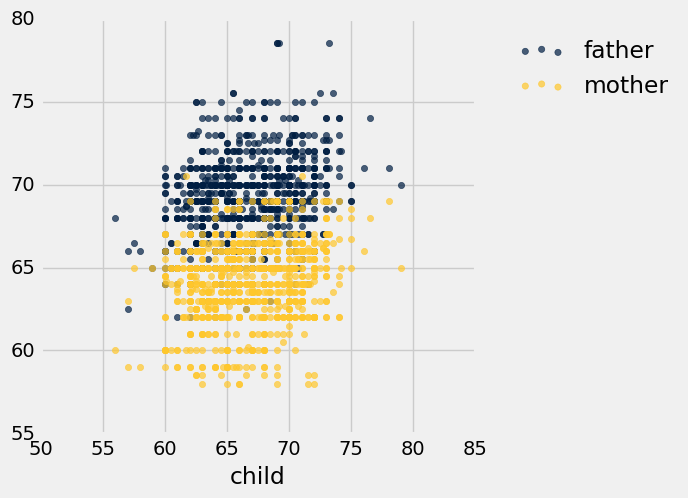

In [29]:
height.scatter(2)

In [30]:
height = height.with_column(
    'parent average', (height.column('mother') + height.column('father')) / 2
)

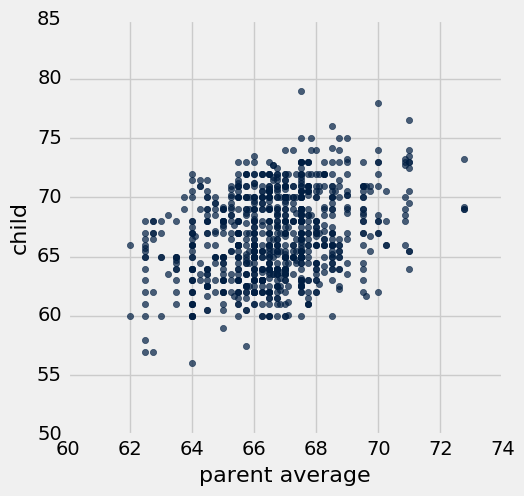

In [31]:
height.scatter('parent average', 'child')

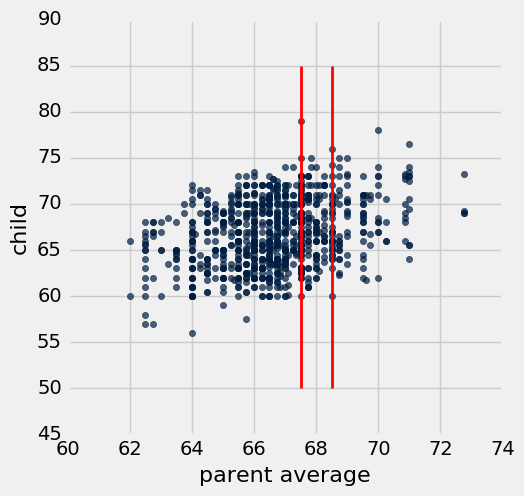

In [32]:
height.scatter('parent average', 'child')
_ = plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)

In [33]:
close_to_68 = height.where('parent average', are.between(67.5, 68.5))
close_to_68

father,mother,child,parent average
74,62,74,68
74,62,70,68
74,62,68,68
74,62,67,68
74,62,67,68
74,62,66,68
74,62,63.5,68
74,62,63,68
74,61,65,67.5
73.2,63,62.7,68.1


In [34]:
close_to_68.column('child').mean()

67.620000000000005

In [35]:
def predict_child(p):
    close_points = height.where('parent average', are.between(p - 0.5, p + 0.5))
    return close_points.column('child').mean()                       

In [36]:
predict_child(68)

67.620000000000005

In [37]:
predict_child(65)

65.838297872340434

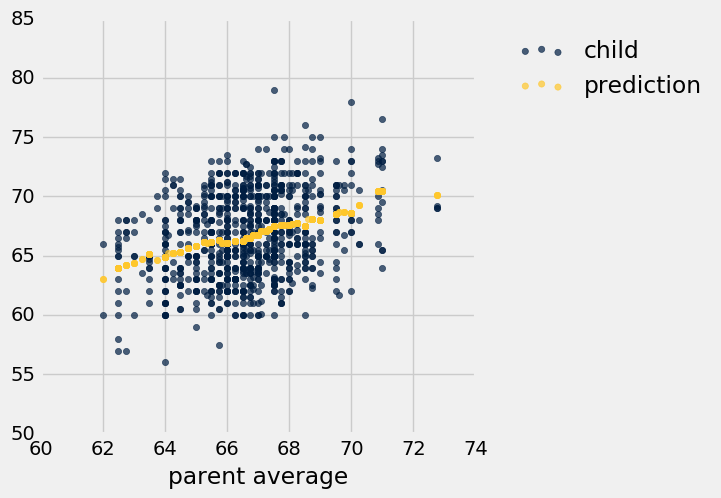

In [38]:
# Apply predict_child to all the midparent heights

height.with_column(
    'prediction', height.apply(predict_child, 'parent average')
).select(2, 3, 4).scatter('parent average')